# One direction LSTM Models For Univariate Time Series Forecasting

In [57]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [58]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [59]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [60]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [61]:
X

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [62]:
X.shape

(6, 3)

In [63]:
# when implementing LSTM, must reshape to 3 dimensions!!!
# reshape from [samples, timesteps] into [samples, timesteps, features]
# only have lagged features, so is 1. if multi-variate, then add accordingly
n_features = 1 
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [64]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

In [65]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [66]:
print(n_steps) # 3 values from the past
print(n_features) # only 1 feature, across the time (3 steps)

3
1


In [83]:
# define model
model = Sequential()
# 如果是stacked LSTM, 第一个LSTM必须要return_sequences=True，因为预测需要从第一个LSTM传到第二个
# 因为return_sequences=True，所以第一个LSTM的输出形状为(None, 3, 50)，3是因为每个step会输出一个值，step=3
# 第二层LSTM有(50 * 50 + 50 * 50 + 50) * 4 = 20,200个参数值，跟前面的3没关系
# for LSTM, default activation is 'tanh'
# for some time series forecasting problem, relu is good. 
# Just need to try different activations
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1)) # this output layer is used to make prediction, h(t)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 3, 50)             10400     
                                                                 
 lstm_25 (LSTM)              (None, 50)                20200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [68]:
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 39661.1445
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 38721.0820
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 37756.4258
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 36666.3477
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 35703.4258
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 35082.4141
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 34645.2461
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 34245.8320
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 33830.7695
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 33376.5898
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 32862.3281
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 32263.6895
Epoch 13/300
1

1/1 [==============================] - 0s 5ms/step - loss: 10.7652
Epoch 102/300
1/1 [==============================] - 0s 6ms/step - loss: 10.9041
Epoch 103/300
1/1 [==============================] - 0s 5ms/step - loss: 11.0406
Epoch 104/300
1/1 [==============================] - 0s 6ms/step - loss: 11.0334
Epoch 105/300
1/1 [==============================] - 0s 6ms/step - loss: 10.9521
Epoch 106/300
1/1 [==============================] - 0s 6ms/step - loss: 10.8383
Epoch 107/300
1/1 [==============================] - 0s 6ms/step - loss: 10.7036
Epoch 108/300
1/1 [==============================] - 0s 6ms/step - loss: 10.5583
Epoch 109/300
1/1 [==============================] - 0s 5ms/step - loss: 10.4154
Epoch 110/300
1/1 [==============================] - 0s 6ms/step - loss: 10.2855
Epoch 111/300
1/1 [==============================] - 0s 6ms/step - loss: 10.1729
Epoch 112/300
1/1 [==============================] - 0s 6ms/step - loss: 10.0732
Epoch 113/300
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 3.8237
Epoch 203/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7835
Epoch 204/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7764
Epoch 205/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7838
Epoch 206/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7591
Epoch 207/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7290
Epoch 208/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7300
Epoch 209/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7340
Epoch 210/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7104
Epoch 211/300
1/1 [==============================] - 0s 6ms/step - loss: 3.6805
Epoch 212/300
1/1 [==============================] - 0s 7ms/step - loss: 3.6687
Epoch 213/300
1/1 [==============================] - 0s 6ms/step - loss: 3.6720
Epoch 214/300
1/1 [==============================] - 0

In [69]:
# demonstrate prediction
x_input = np.array([187, 196, 210])
x_input = x_input.reshape((1, n_steps, n_features)) # 注意只有1个sample
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 324ms/step
[[224.51172]]


### Predicting For the next 10 data

In [70]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i < 10):
    
    if(len(temp_input)>3): # 当有了一个prediction后，
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i+1,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features)) # 注意只有1个sample
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i+1,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        print("{} day input {}".format(i+1,x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i+1,yhat))
        temp_input.append(yhat[0][0]) # 取prediction值
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

1 day input [187 196 210]
1 day output [[224.51172]]
2 day input [196.         210.         224.51171875]
2 day output [[236.4469]]
3 day input [210.         224.51171875 236.44689941]
3 day output [[250.36475]]
4 day input [224.51172 236.4469  250.36475]
4 day output [[264.69223]]
5 day input [236.4469  250.36475 264.69223]
5 day output [[278.24286]]
6 day input [250.36475 264.69223 278.24286]
6 day output [[292.8722]]
7 day input [264.69223 278.24286 292.8722 ]
7 day output [[307.91385]]
8 day input [278.24286 292.8722  307.91385]
8 day output [[322.94254]]
9 day input [292.8722  307.91385 322.94254]
9 day output [[338.77713]]
10 day input [307.91385 322.94254 338.77713]
10 day output [[355.09964]]
[224.51172, 236.4469, 250.36475, 264.69223, 278.24286, 292.8722, 307.91385, 322.94254, 338.77713, 355.09964]


In [71]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [72]:
len(timeseries_data)

9

In [73]:
lst_output

[224.51172,
 236.4469,
 250.36475,
 264.69223,
 278.24286,
 292.8722,
 307.91385,
 322.94254,
 338.77713,
 355.09964]

### Visualizaing The Output

In [75]:
import matplotlib.pyplot as plt

In [76]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

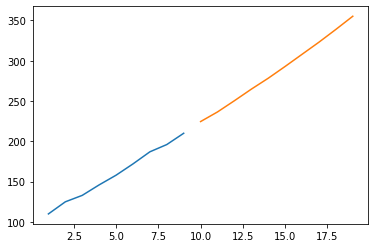

In [77]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)


# Bidirectional LSTM

In [79]:
# define model
from tensorflow.keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [80]:
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 24411.9043
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 23734.7793
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 23027.1465
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 22284.9766
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 21507.6543
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 20686.9043
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 19877.3730
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 19112.2949
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 18396.2344
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 17722.5957
Epoch 11/300
1/1 [==============================] - 0s 4ms/step - loss: 17083.2051
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 16469.9297
Epoch 13/300
1

1/1 [==============================] - 0s 5ms/step - loss: 12.4030
Epoch 102/300
1/1 [==============================] - 0s 5ms/step - loss: 12.2162
Epoch 103/300
1/1 [==============================] - 0s 6ms/step - loss: 12.0120
Epoch 104/300
1/1 [==============================] - 0s 5ms/step - loss: 11.8354
Epoch 105/300
1/1 [==============================] - 0s 5ms/step - loss: 11.7757
Epoch 106/300
1/1 [==============================] - 0s 5ms/step - loss: 11.8174
Epoch 107/300
1/1 [==============================] - 0s 6ms/step - loss: 11.7316
Epoch 108/300
1/1 [==============================] - 0s 5ms/step - loss: 11.5500
Epoch 109/300
1/1 [==============================] - 0s 5ms/step - loss: 11.3874
Epoch 110/300
1/1 [==============================] - 0s 4ms/step - loss: 11.2973
Epoch 111/300
1/1 [==============================] - 0s 5ms/step - loss: 11.2562
Epoch 112/300
1/1 [==============================] - 0s 5ms/step - loss: 11.2089
Epoch 113/300
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 2.2680
Epoch 204/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2501
Epoch 205/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2489
Epoch 206/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2571
Epoch 207/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2573
Epoch 208/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2476
Epoch 209/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2286
Epoch 210/300
1/1 [==============================] - 0s 7ms/step - loss: 2.2164
Epoch 211/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2144
Epoch 212/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2157
Epoch 213/300
1/1 [==============================] - 0s 5ms/step - loss: 2.2120
Epoch 214/300
1/1 [==============================] - 0s 7ms/step - loss: 2.1990
Epoch 215/300
1/1 [==============================] - 0

In [81]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i < 10):
    
    if(len(temp_input)>3): # 当有了一个prediction后，
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i+1,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features)) # 注意只有1个sample
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i+1,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        print("{} day input {}".format(i+1,x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i+1,yhat))
        temp_input.append(yhat[0][0]) # 取prediction值
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

1 day input [187 196 210]
1 day output [[220.96135]]
2 day input [196.         210.         220.96134949]
2 day output [[231.20758]]
3 day input [210.         220.96134949 231.20758057]
3 day output [[242.6957]]
4 day input [220.96135 231.20758 242.6957 ]
4 day output [[252.75047]]
5 day input [231.20758 242.6957  252.75047]
5 day output [[263.3645]]
6 day input [242.6957  252.75047 263.3645 ]
6 day output [[274.04816]]
7 day input [252.75047 263.3645  274.04816]
7 day output [[284.5311]]
8 day input [263.3645  274.04816 284.5311 ]
8 day output [[295.39175]]
9 day input [274.04816 284.5311  295.39175]
9 day output [[306.3053]]
10 day input [284.5311  295.39175 306.3053 ]
10 day output [[317.38394]]
[220.96135, 231.20758, 242.6957, 252.75047, 263.3645, 274.04816, 284.5311, 295.39175, 306.3053, 317.38394]


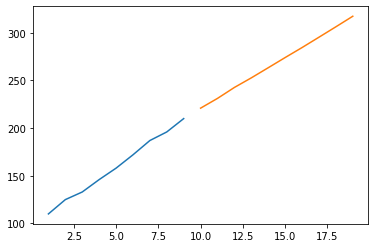

In [82]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
